<a href="https://colab.research.google.com/github/Shrek0437/AI-ML_Models/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [212]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [213]:
X = data[['total_bedrooms']]
y = data['population']

In [214]:
X

,total_bedrooms
0,1283.0
1,1901.0
2,174.0
3,337.0
4,326.0
...,...
16995,394.0
16996,528.0
16997,531.0
16998,552.0


In [215]:
y

,population
0,1015.0
1,1129.0
2,333.0
3,515.0
4,624.0
...,...
16995,907.0
16996,1194.0
16997,1244.0
16998,1298.0


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [217]:
X_train

,total_bedrooms
5524,797.0
267,1652.0
12381,827.0
12727,469.0
15712,299.0
...,...
11284,475.0
11964,144.0
5390,205.0
860,895.0


In [218]:
# Initialize the classifier
clf = DecisionTreeClassifier(max_depth=3)

# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [219]:
y_pred = clf.predict(X_test)

In [220]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0013235294117647058


In [221]:
from sklearn.model_selection import cross_val_score, KFold

# Use KFold instead of StratifiedKFold to avoid the error
scores = cross_val_score(clf, X, y, cv=KFold(n_splits=3))
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")

Cross-Validation Accuracy: 0.00


In [222]:
# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         2
        17.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         2
        27.0       0.00      0.00      0.00         2
        28.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         1
        34.0       0.00      0.00      0.00         2
        37.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         2
        42.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         2
        46.0       0.00      0.00      0.00         1
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

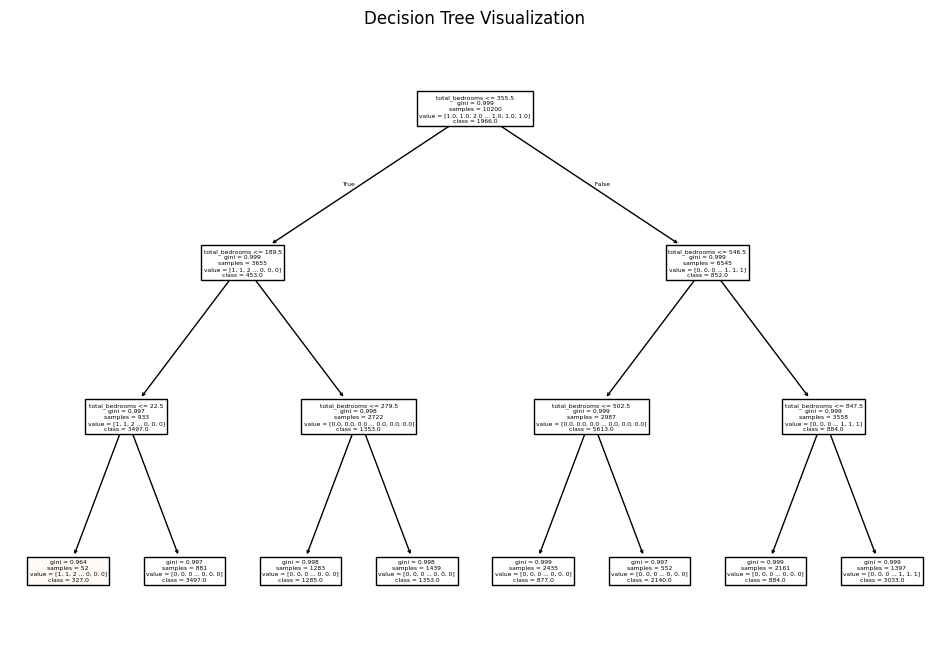

In [223]:
# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
# Get unique class names from the target variable 'y'
class_names = data['population'].unique().astype(str)  # Convert to string for plot_tree
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [224]:
# Calculate train and test scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

# Print the scores
print(f"Training Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")

Training Score: 0.01
Test Score: 0.00


In [225]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming you have already trained your model (clf) and have y_test and y_pred

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-squared: 0.36221091650399706
Mean Squared Error: 726607.2123529412
Mean Absolute Error: 420.1920588235294


R² Score: -1.6345500661442136


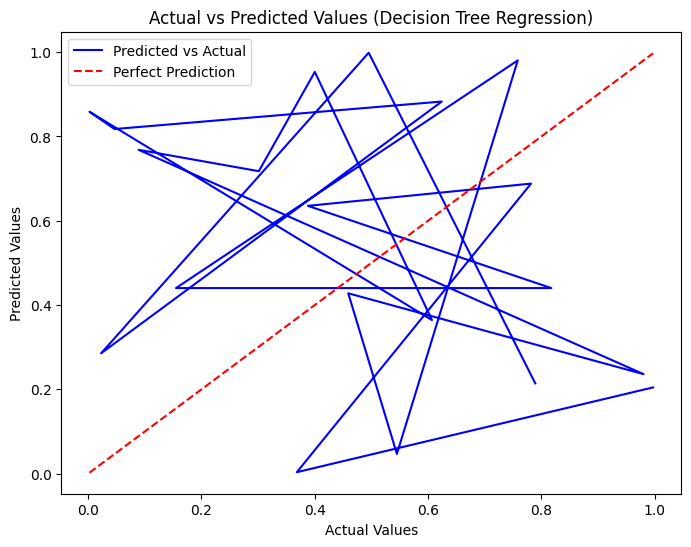

In [226]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Example data (replace with your actual dataset)
X = np.random.rand(100, 5)  # Example feature matrix
y = np.random.rand(100)     # Example target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Decision Tree regressor model (replace with your model)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.plot(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot a line of perfect prediction (y = x line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree Regression)')
plt.legend()

# Show the plot
plt.show()
